In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [2]:
train_dir = "../data/train"
val_dir = "../data/val"
img_height, img_width = 224, 224
batch_size = 32
num_classes = 5


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


FileNotFoundError: [WinError 3] The system cannot find the path specified: '../data/train'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameters
img_height = 224
img_width = 224
batch_size = 32

# Directories
train_dir = "../data/Rice_Image_Dataset_split/train"
val_dir = "../data/Rice_Image_Dataset_split/validation"

# Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescale for validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


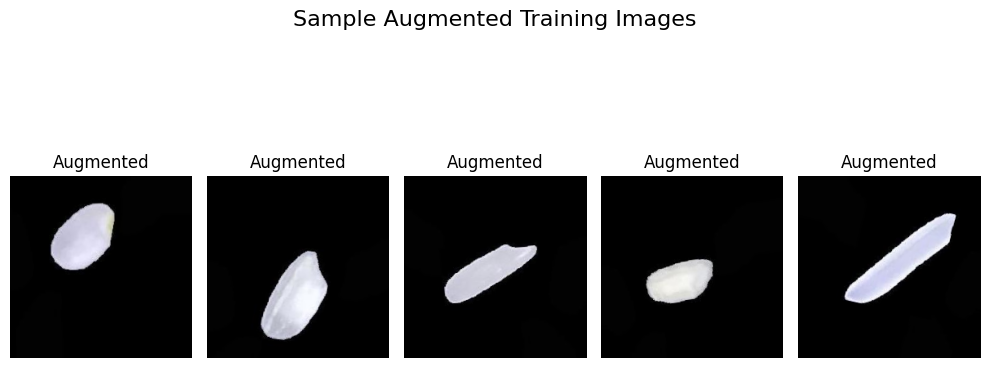

In [5]:
import matplotlib.pyplot as plt

# Get a batch of augmented images
augmented_images, augmented_labels = next(train_generator)

# Plot the first 5 augmented images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(augmented_images[i])
    plt.title("Augmented")
    plt.axis('off')
plt.suptitle("Sample Augmented Training Images", fontsize=16)
plt.tight_layout()
plt.show()
